# EDA New York Listings
## Pandas, Seaborn, Matplotlib

In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [12]:
listings_df = pd.read_csv("Desktop\DATA\AB_NYC_2019.csv")

In [13]:
listings_df.shape

(48895, 16)

In [14]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Limpiando Datos

In [15]:
listings_df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [16]:
listings_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
colums_to_drop = ["id", "host_name", "last_review"]

In [23]:
listings_df.drop(colums_to_drop, axis="columns", inplace=True)

In [24]:
listings_df.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [30]:
listings_df.fillna({"reviews_per_month":0}, inplace=True)

In [31]:
listings_df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [32]:
listings_df["name"]

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [33]:
listings_df["price"]

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [35]:
listings_df[["name", "neighbourhood","price"]]

,name,neighbourhood,price
0,Clean & quiet apt home by the park,Kensington,149
1,Skylit Midtown Castle,Midtown,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,150
3,Cozy Entire Floor of Brownstone,Clinton Hill,89
4,Entire Apt: Spacious Studio/Loft by central park,East Harlem,80
...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Bedford-Stuyvesant,70
48891,Affordable room in Bushwick/East Williamsburg,Bushwick,40
48892,Sunny Studio at Historical Neighborhood,Harlem,115
48893,43rd St. Time Square-cozy single bed,Hell's Kitchen,55


In [36]:
listings_df["price"] <100

0        False
1        False
2        False
3         True
4         True
         ...  
48890     True
48891     True
48892    False
48893     True
48894     True
Name: price, Length: 48895, dtype: bool

In [37]:
listings_df[listings_df["price"] <100]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,QUIT PRIVATE HOUSE,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,0.00,2,163
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


# Análisis Exploratorio (EDA)

## 10 Listings con mas Reviews

In [38]:
listings_df.nlargest(10,"number_of_reviews")

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


## Cuáles son los Barrios?

In [39]:
listings_df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

## Cuántos alquileres existen por Barrio?

In [41]:
listings_df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## 10 Zonas con mas listings.

In [42]:
listings_df["neighbourhood"].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<AxesSubplot:>

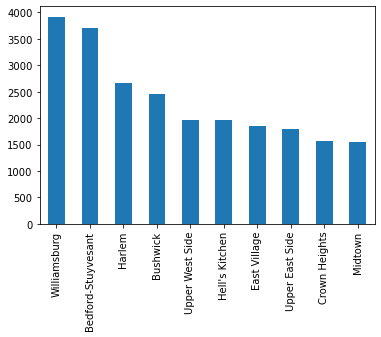

In [44]:
listings_df["neighbourhood"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

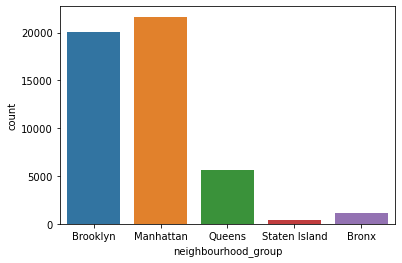

In [46]:
sns.countplot(data=listings_df, x="neighbourhood_group")

In [51]:
order = listings_df["neighbourhood_group"].value_counts().index

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

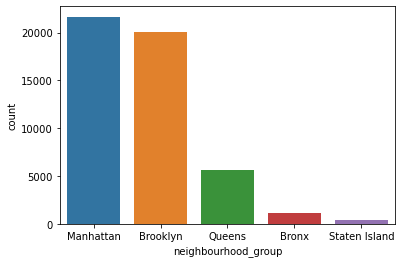

In [53]:
sns.countplot(data=listings_df, x="neighbourhood_group", order=order)

## Tipo de habitación

In [54]:
listings_df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

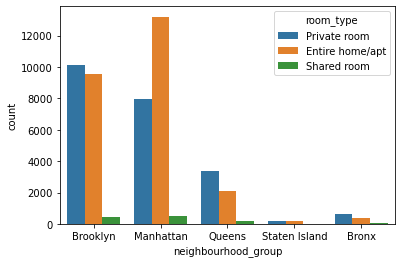

In [55]:
sns.countplot(data = listings_df, x="neighbourhood_group", hue="room_type")

## Distribución de Precios

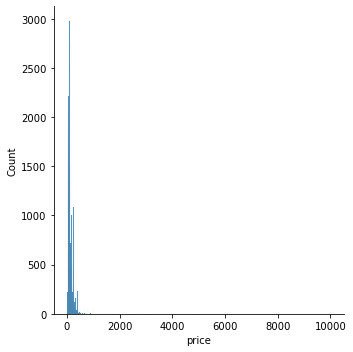

In [56]:
sns.displot(listings_df["price"])

## Valores menores a 500

In [61]:
affordable_df = listings_df[listings_df["price"]<=500]

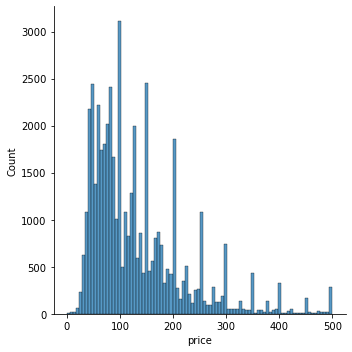

In [62]:
sns.displot(affordable_df["price"])

## Valor Promedio

In [63]:
listings_df["price"].mean()

152.7206871868289

In [64]:
affordable_df["price"].mean()

131.53056362458466

## Precios por Grupos de Barrios

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

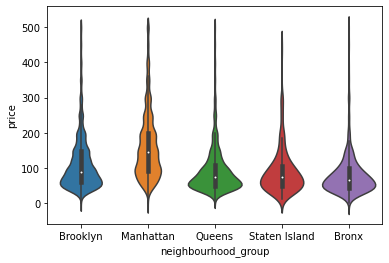

In [66]:
sns.violinplot(data=affordable_df, x="neighbourhood_group", y="price")